In [42]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd

In [43]:
df = pd.read_csv('pages.csv')
data = df.to_numpy().transpose()
for i in range(len(data[3])):
    data[3][i] = float(data[3][i].replace('%', '')) 

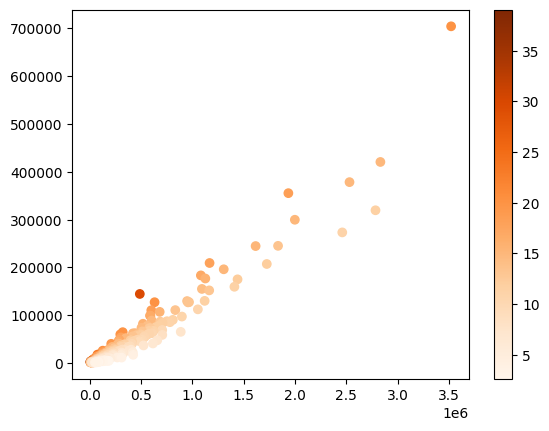

In [44]:
x = data[2]
y = data[1]
colors = data[3]
plt.scatter(x, y, c=colors, cmap='Oranges')
plt.colorbar()
plt.show()

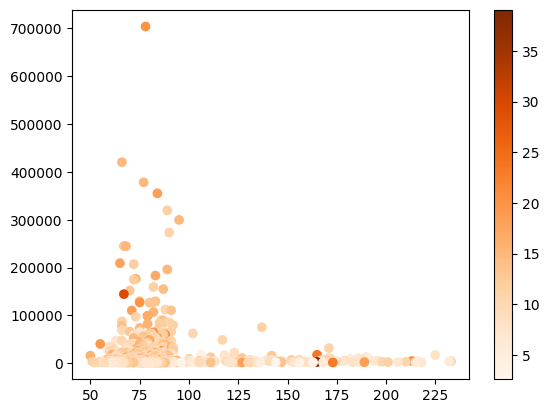

In [54]:

x = []
for i in data[0]:
    x.append(len(i))

y = data[1]
colors = data[3]
plt.scatter(x, y, c=colors, cmap='Oranges')
plt.colorbar()
plt.show()

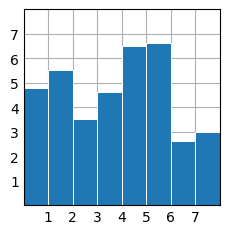

In [31]:
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()